# Final Project

## Predict whether a mammogram mass is benign or malignant

We'll be using the "mammographic masses" public dataset from the UCI repository (source: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass)

This data contains 961 instances of masses detected in mammograms, and contains the following attributes:


   1. BI-RADS assessment: 1 to 5 (ordinal)  
   2. Age: patient's age in years (integer)
   3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
   4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
   5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
   6. Severity: benign=0 or malignant=1 (binominal)
   
BI-RADS is an assesment of how confident the severity classification is; it is not a "predictive" attribute and so we will discard it. The age, shape, margin, and density attributes are the features that we will build our model with, and "severity" is the classification we will attempt to predict based on those attributes.

Although "shape" and "margin" are nominal data types, which sklearn typically doesn't deal with well, they are close enough to ordinal that we shouldn't just discard them. The "shape" for example is ordered increasingly from round to irregular.

A lot of unnecessary anguish and surgery arises from false positives arising from mammogram results. If we can build a better way to interpret them through supervised machine learning, it could improve a lot of lives.

## Your assignment

Apply several different supervised machine learning techniques to this data set, and see which one yields the highest accuracy as measured with K-Fold cross validation (K=10). Apply:

* Decision tree
* Random forest
* KNN
* Naive Bayes
* SVM
* Logistic Regression
* And, as a bonus challenge, a neural network using Keras.

The data needs to be cleaned; many rows contain missing data, and there may be erroneous data identifiable as outliers as well.

Remember some techniques such as SVM also require the input data to be normalized first.

Many techniques also have "hyperparameters" that need to be tuned. Once you identify a promising approach, see if you can make it even better by tuning its hyperparameters.

I was able to achieve over 80% accuracy - can you beat that?

Below I've set up an outline of a notebook for this project, with some guidance and hints. If you're up for a real challenge, try doing this project from scratch in a new, clean notebook!


## Let's begin: prepare your data

We import the mammographic data stored in a text file. There are some missing values in there, so we replace the NaN while importing instead of doing it afterwards. We also add appropriate column names for the data to aid our analysis of it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree

cols_names = ["BI-RADS","Age","Shape","Margin","Density","Severity"]
#data_f = pd.read_csv("mammographic_masses.data.txt",sep = ",",names = cols_names)
data_f = pd.read_csv("mammographic_masses.data.txt",sep = ",",names = cols_names, na_values = "?") 
# alternative to convert ? to NaN
# right at the start when loading the data

data_f.head(15)

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
8,5.0,57.0,1.0,5.0,3.0,1
9,5.0,60.0,NaN,5.0,1.0,1


We want to see what is happening with the data and evaluate whether or not it needs to be cleaned.

In [2]:
df = data_f
df.describe(include  = "all")

,BI-RADS,Age,Shape,Margin,Density,Severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


Before we can perform any further operations on the data we want to understand the data types contained in the dataframe as these will affect our ability to perform certain operations on the data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BI-RADS   959 non-null    float64
 1   Age       956 non-null    float64
 2   Shape     930 non-null    float64
 3   Margin    913 non-null    float64
 4   Density   885 non-null    float64
 5   Severity  961 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 45.2 KB


In [6]:
df_No_NA = df.dropna()
df_No_NA.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
8,5.0,57.0,1.0,5.0,3.0,1
10,5.0,76.0,1.0,4.0,3.0,1


In [7]:
df_No_NA.describe(include = "all")

,BI-RADS,Age,Shape,Margin,Density,Severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


The BI-RADS column should not be included as a feature in our data. It contains values ranging from 1 (definitely benign) to 5 (highly suggestive of maligancy) assigned by physicians during a double-review process and is not predictive.

In [8]:
df_No_Birads = df_No_NA.drop(["BI-RADS"], axis=1)
df_No_Birads.head()

,Age,Shape,Margin,Density,Severity
0,67.0,3.0,5.0,3.0,1
2,58.0,4.0,5.0,3.0,1
3,28.0,1.0,1.0,3.0,0
8,57.0,1.0,5.0,3.0,1
10,76.0,1.0,4.0,3.0,1


We then convert the Pandas dataframes into numpy arrays that can be used by scikit_learn. We create an array containting the features we want to work with (age, shape, margin, and density) and another array that contains the class labels (severity). 

In [9]:
data = df_No_Birads.to_numpy()
x_features = data[:,0:4]
y_labels = data[:,4]
y_labels.shape = (y_labels.shape[0],1)
#Check that the dimensions are as expected
print("data dimensions = ",data.shape)
print("x_features dimensions = ",x_features.shape)
print("y_labels dimensions = ",y_labels.shape)

data dimensions =  (830, 5)
x_features dimensions =  (830, 4)
y_labels dimensions =  (830, 1)


In [10]:
#Just for debugging purposes
print("data sample:",data[0:4,])
print("x_features sample:",x_features[0:4,])
print("y_labels sample:", y_labels[0:4])

data sample: [[67.  3.  5.  3.  1.]
 [58.  4.  5.  3.  1.]
 [28.  1.  1.  3.  0.]
 [57.  1.  5.  3.  1.]]
x_features sample: [[67.  3.  5.  3.]
 [58.  4.  5.  3.]
 [28.  1.  1.  3.]
 [57.  1.  5.  3.]]
y_labels sample: [[1.]
 [1.]
 [0.]
 [1.]]


Some of our models require the input data to be normalized,so we normalise the data.

In [11]:
x_scaled = preprocessing.StandardScaler().fit_transform(x_features)
x_scaled.shape

(830, 4)

In [12]:
X = x_scaled
y = y_labels

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

## Decision Trees


We leave out the decision tree for now as the externals package is returning errors for StringIO due to deprecated packages not supported by the latest version of my sci-kit learn. We'll come back to this later after resolving the issue.

In [13]:
#tree_clf = tree.DecisionTreeClassifier().fit(X_train,y_train)

Display the resulting decision tree.

In [14]:
"""
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus
"""


'\nfrom IPython.display import Image  \nfrom sklearn.externals.six import StringIO  \nimport pydotplus\n'

RandomForestClassifier 

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rdf = RandomForestClassifier(n_estimators = 10).fit(X_train,y_train.ravel())

prediction = rdf.predict(X_test)

#print(prediction.size)
#print("prediction:",prediction)
acc = accuracy_score(y_test,prediction)
print("Random forest test accuracy:",acc)

Random forest test accuracy: 0.7307692307692307


## SVM



In [16]:
from sklearn import svm
kernels = ['rbf','linear','poly','sigmoid']
acc_scores = []

for index,kern in enumerate(kernels):
    clf = svm.SVC(kernel = kern).fit(X_train,y_train.ravel())
    svm_pred = clf.predict(X_test)
    svm_score = accuracy_score(y_test,svm_pred)
    acc_scores.append(svm_score)
    #print("SVM test accuracy for " + kern + " kernel: "+ str(svm_score))
print("The best accuracy score is: " + str(np.amax(acc_scores)))# +" from the "+str(kernels[index])+" kernel")

The best accuracy score is: 0.7932692307692307


## KNN


Choosing K is tricky, so we can't discard KNN until we've tried different values of K. Write a for loop to run KNN with K values ranging from 1 to 50 and see if K makes a substantial difference. Make a note of the best performance you could get out of KNN.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
for k in range(1,12):
    neighbor = KNeighborsClassifier(n_neighbors= k).fit(X_train,y_train.ravel())
    knn_pred = neighbor.predict(X_test)
    knn_score = accuracy_score(y_test,knn_pred)
    knn_scores.append(knn_score)
    #print("kNN test accuracy score for k =" + str(k) + " is " + str(knn_score))
print("The highest score is:",np.amax(knn_scores))

The highest score is: 0.7788461538461539


## Naive Bayes



In [18]:
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
nb_pred = gauss.fit(X_train,y_train.ravel()).predict(X_test)
print("Gaussian Naive Bayes test accuracy score: ",accuracy_score(y_test,nb_pred)) 

Gaussian Naive Bayes test accuracy score:  0.7788461538461539


## Logistic Regression



In [19]:
from sklearn.linear_model import LogisticRegression
lgt_pred = LogisticRegression().fit(X_train,y_train.ravel()).predict(X_test)
print("Logistic regression test accuracy score:", accuracy_score(y_test,lgt_pred))

Logistic regression test accuracy score: 0.7836538461538461


## Neural Networks

Multi-layer Perceptron using Keras.

In [29]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop,Adam,SGD

In [21]:
#Hyperparameters
no_of_units = 10
no_of_units_final = 4
no_of_out_units = 1
activation_funct = 'relu'
output_funct = 'sigmoid'
no_of_features = X_train.shape[1]

In [22]:
#Build network layers
model = Sequential()
model.add(Dense(no_of_units, activation = activation_funct, input_shape = (no_of_features,)))
model.add(Dense(no_of_units, activation = activation_funct))
model.add(Dense(no_of_units_final, activation = activation_funct))
model.add(Dense(no_of_out_units, activation = output_funct))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [23]:
#Model summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 44        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [24]:
#Setup loss function and optimiser
model.compile(loss = 'binary_crossentropy',
             optimizer = 'Adam',
             metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [25]:
#Train model
history = model.fit(X_train, y_train,
                   batch_size = 100,
                   epochs = 100,
                   verbose = 2,
                   validation_data = (X_test,y_test))

Train on 622 samples, validate on 208 samples
Epoch 1/100
622/622 - 0s - loss: 0.6486 - acc: 0.5884 - val_loss: 0.6414 - val_acc: 0.6010
Epoch 2/100
622/622 - 0s - loss: 0.6376 - acc: 0.6190 - val_loss: 0.6332 - val_acc: 0.6538
Epoch 3/100
622/622 - 0s - loss: 0.6289 - acc: 0.6977 - val_loss: 0.6254 - val_acc: 0.7212
Epoch 4/100
622/622 - 0s - loss: 0.6202 - acc: 0.7267 - val_loss: 0.6170 - val_acc: 0.7308
Epoch 5/100
622/622 - 0s - loss: 0.6115 - acc: 0.7460 - val_loss: 0.6084 - val_acc: 0.7356
Epoch 6/100
622/622 - 0s - loss: 0.6022 - acc: 0.7492 - val_loss: 0.5992 - val_acc: 0.7404
Epoch 7/100
622/622 - 0s - loss: 0.5922 - acc: 0.7556 - val_loss: 0.5893 - val_acc: 0.7404
Epoch 8/100
622/622 - 0s - loss: 0.5812 - acc: 0.7733 - val_loss: 0.5793 - val_acc: 0.7500
Epoch 9/100
622/622 - 0s - loss: 0.5695 - acc: 0.7846 - val_loss: 0.5684 - val_acc: 0.7692
Epoch 10/100
622/622 - 0s - loss: 0.5573 - acc: 0.7894 - val_loss: 0.5575 - val_acc: 0.7596
Epoch 11/100
622/622 - 0s - loss: 0.5450 - 

Epoch 90/100
622/622 - 0s - loss: 0.4191 - acc: 0.8296 - val_loss: 0.4845 - val_acc: 0.8029
Epoch 91/100
622/622 - 0s - loss: 0.4183 - acc: 0.8296 - val_loss: 0.4845 - val_acc: 0.8029
Epoch 92/100
622/622 - 0s - loss: 0.4181 - acc: 0.8296 - val_loss: 0.4847 - val_acc: 0.8029
Epoch 93/100
622/622 - 0s - loss: 0.4183 - acc: 0.8312 - val_loss: 0.4852 - val_acc: 0.8029
Epoch 94/100
622/622 - 0s - loss: 0.4180 - acc: 0.8312 - val_loss: 0.4851 - val_acc: 0.8029
Epoch 95/100
622/622 - 0s - loss: 0.4177 - acc: 0.8312 - val_loss: 0.4853 - val_acc: 0.8077
Epoch 96/100
622/622 - 0s - loss: 0.4170 - acc: 0.8296 - val_loss: 0.4854 - val_acc: 0.8077
Epoch 97/100
622/622 - 0s - loss: 0.4172 - acc: 0.8328 - val_loss: 0.4865 - val_acc: 0.8029
Epoch 98/100
622/622 - 0s - loss: 0.4167 - acc: 0.8328 - val_loss: 0.4865 - val_acc: 0.8077
Epoch 99/100
622/622 - 0s - loss: 0.4163 - acc: 0.8312 - val_loss: 0.4862 - val_acc: 0.8077
Epoch 100/100
622/622 - 0s - loss: 0.4161 - acc: 0.8312 - val_loss: 0.4868 - val

In [26]:
#Model results
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.48676761526327866
Test accuracy: 0.8076923


In [27]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


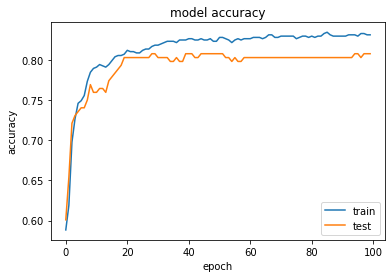

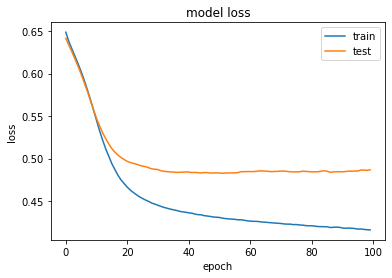

In [28]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(['train','test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['train','test'])
plt.show()